# Techniques to Generate New Image Training Data

Here, I'll show how to apply the image augementation to generate a robust training data 
for training an image recognition neural network model.

Augementations include:
 - Rotation
 - Perspective Transformation
 - Blurring
 - Brightness Adjustment
 - Shearing
 - Add Noise

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

import cv2
import imutils
import random
import skimage as sk

In [2]:
stop_sign = mpimg.imread("stop_sign_perfect.png")

## Let's see a Representative Perfect Stop Sign

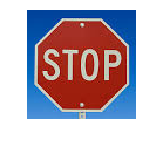

In [3]:
plt.rcParams["figure.figsize"] = [2, 2]
plt.imshow(stop_sign)
plt.axis('off')
plt.show()

In [4]:
def change_brightness(image):
    # Randomly select a percent change
    change_pct = random.uniform(0.4, 1.2)
    
    # Change to HSV to change the brightness V
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = hsv[:,:,2] * change_pct
    
    #Convert back to RGB 
    img_brightness = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return img_brightness


def flip_image(image, angle):
    img_flip = cv2.flip(image,1)
    angle = -angle
    return img_flip, angle


def rotate_image(image, angle_range):
    
    rotate_angle = np.random.uniform(-angle_range, angle_range)
    width, height, nchannel = image.shape
    
    rotated_image = imutils.rotate_bound(image, rotate_angle)
    return rotated_image


def add_noise(image):
    
    # Reference: http://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise
    # mode: gaussian, localvar, poisson, salt, pepper, s&p, speckle
    noisy_image = sk.util.random_noise(stop_sign, mode='salt', seed=None, clip=True)
    
    return noisy_image

def blur_image(image):
    
    # http://docs.opencv.org/2.4/doc/tutorials/imgproc/gausian_median_blur_bilateral_filter/gausian_median_blur_bilateral_filter.html
    # Kernel depends on image size
    ksize_poss = [3, 5, 7]
    rand_ksize = ksize_poss[random.randint(0, 2)]
    rand_sigmaX = random.randint(0, 5)
    rand_sigmaY = random.randint(0, 5)
    
    return cv2.GaussianBlur(image, ksize=(rand_ksize,rand_ksize), sigmaX=rand_sigmaX, sigmaY=rand_sigmaY)
    

## Rotations

In [5]:
stop_sign = plt.imread('stop_sign_perfect.jpg', 1)
print('size', np.shape(stop_sign))

size (93, 93, 3)


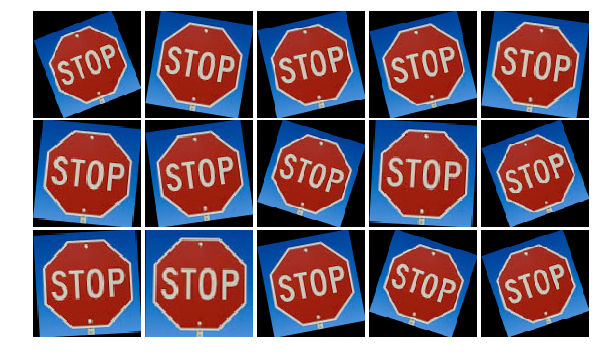

In [6]:
plt.figure(figsize = (10,6))
gs1 = gridspec.GridSpec(3,5)
gs1.update(wspace=0.01, hspace=0.02)

for i in range(15):
    new_image = rotate_image(stop_sign, 22)
    plt.axis('off')
    ax1 = plt.subplot(gs1[i])
    ax1.set_aspect('equal')
    plt.axis('off')
    plt.imshow(new_image)

plt.show()

## Add Noise

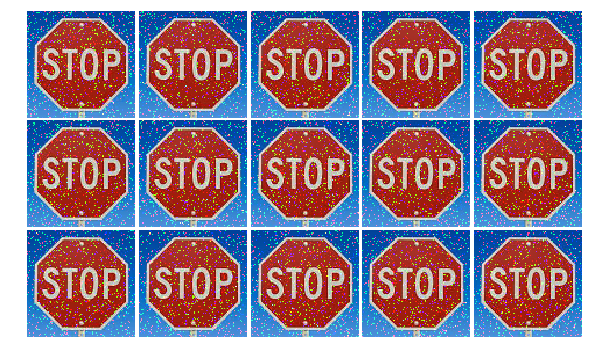

In [7]:
plt.figure(figsize = (10,6))
gs1 = gridspec.GridSpec(3,5)
gs1.update(wspace=0.01, hspace=0.02)

for i in range(15):
    new_image = add_noise(stop_sign)
    plt.axis('off')
    ax1 = plt.subplot(gs1[i])
    ax1.set_aspect('equal')
    plt.axis('off')
    plt.imshow(new_image)

plt.show()

## Blur

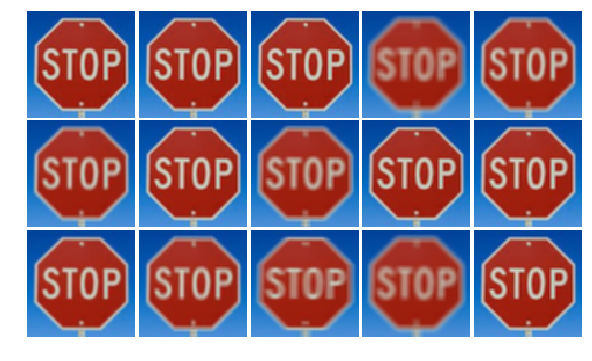

In [8]:
plt.figure(figsize = (10,6))
gs1 = gridspec.GridSpec(3,5)
gs1.update(wspace=0.01, hspace=0.02)

for i in range(15):
    
    new_image = blur_image(stop_sign)
    plt.axis('off')
    ax1 = plt.subplot(gs1[i])
    ax1.set_aspect('equal')
    plt.axis('off')
    plt.imshow(new_image)

plt.show()

## Adjust Brightness

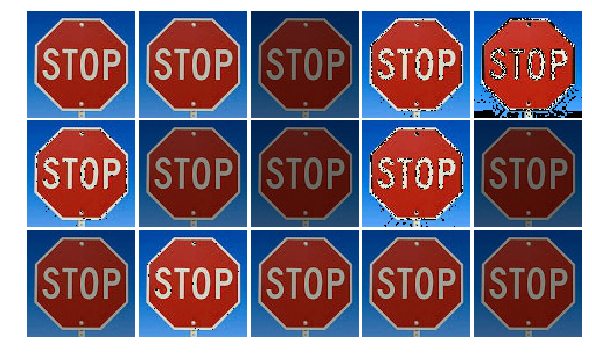

In [9]:
plt.figure(figsize = (10,6))
gs1 = gridspec.GridSpec(3,5)
gs1.update(wspace=0.01, hspace=0.02)

for i in range(15):
    
    new_image = change_brightness(stop_sign)
    plt.axis('off')
    ax1 = plt.subplot(gs1[i])
    ax1.set_aspect('equal')
    plt.axis('off')
    plt.imshow(new_image)

plt.show()

In [10]:
# Code inspired by: https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc

def transform_image(image, ang_range, shear_range, trans_range):

    # Brightness
    image = change_brightness(image) 

    # Blur - just blur a small portion
    if random.randint(1, 5) == 1:
        image = blur_image(image)
       
    # Noise
    if random.randint(1, 5) == 1:
        image = add_noise(image)
    
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    
    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
   
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
       
    return image

## Apply All Augmentations

Applying rotate, shear, translation and brightness adjustment all at once.

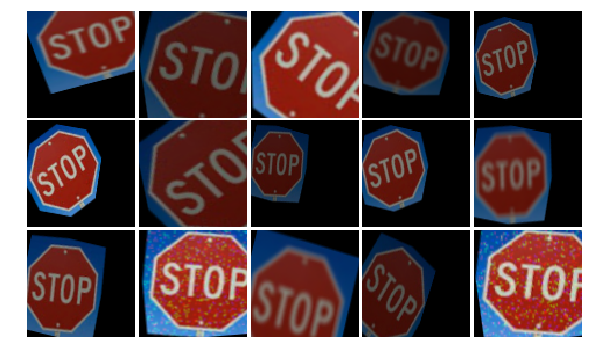

In [11]:
plt.figure(figsize = (10,6))
gs1 = gridspec.GridSpec(3,5)
gs1.update(wspace=0.01, hspace=0.02)

for i in range(15):
    new_image = transform_image(stop_sign, 90, 10, 5)
    plt.axis('off')
    ax1 = plt.subplot(gs1[i])
    ax1.set_aspect('equal')
    plt.axis('off')
    plt.imshow(new_image)

plt.show()